In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Parameters
num_participants = 1000
trials_per_participant = 10

# participant ages
ages = np.random.randint(18, 81, size=num_participants)

data = []

for pid, age in enumerate(ages):
    for trial in range(trials_per_participant):
        # Simulate rewards
        risky_reward = np.random.uniform(15, 30)  # risky: $15-$30
        safe_reward = np.random.uniform(5, 15)    # safe: $5-$15
        
        # Compute differences (risky - safe)
        reward_diff = risky_reward - safe_reward

        # Simulate probability of choosing risky based on age and reward diff
        # Younger people are more likely to take risks
        age_factor = 1 - (age - 18) / 62  # scaled from 1 (youngest) to 0 (oldest)
        prob_risky = 1 / (1 + np.exp(-0.3 * reward_diff)) * age_factor

        # Make choice based 
        choice = np.random.rand() < prob_risky  # 1 = risky, 0 = safe
        
        data.append({
            'participant_id': pid,
            'age': age,
            'trial': trial,
            'risky_reward': round(risky_reward, 2),
            'safe_reward': round(safe_reward, 2),
            'reward_diff': round(reward_diff, 2),
            'choice': int(choice)  # 1 = risky, 0 = safe
        })

df = pd.DataFrame(data)

df.to_csv("data/simulated_data.csv", index=False)

df.head()

,participant_id,age,trial,risky_reward,safe_reward,reward_diff,choice
0,0,56,0,24.20,9.18,15.02,0
1,0,56,1,27.99,5.45,22.54,1
2,0,56,2,20.65,13.11,7.54,0
3,0,56,3,17.26,10.94,6.31,0
4,0,56,4,29.55,13.42,16.13,0


C:\Users\Han.Li26\AppData\Local\Temp\ipykernel_8296\3759135842.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_age = df.groupby('age_group')['choice'].mean().reset_index()
C:\Users\Han.Li26\AppData\Local\Temp\ipykernel_8296\3759135842.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='choice', data=risk_by_age, palette="coolwarm")


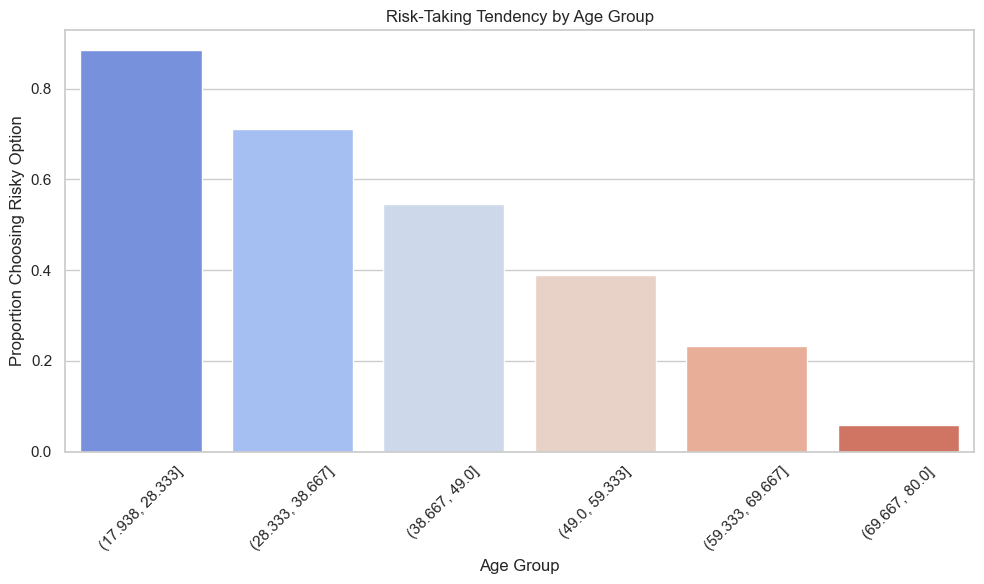

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

# Average risk-taking by age
df['age_group'] = pd.cut(df['age'], bins=6)

risk_by_age = df.groupby('age_group')['choice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='choice', data=risk_by_age, palette="coolwarm")
plt.ylabel("Proportion Choosing Risky Option")
plt.xlabel("Age Group")
plt.title("Risk-Taking Tendency by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/risk_by_age_group.png")
plt.show()


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[['age', 'reward_diff']]
y = df['choice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Eval
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1656
           1       0.73      0.70      0.71      1344

    accuracy                           0.75      3000
   macro avg       0.75      0.74      0.74      3000
weighted avg       0.75      0.75      0.75      3000

